<a href="https://colab.research.google.com/github/SRezaA102/MachineLearningTask/blob/main/Minggu3/3_KNN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS 3
*   NAMA = Syahrul Reza Ananda
*   NIM  = 1103210113
*   Model = kNN
*   Dataset = Iris



# **Prompt Chat GPT**

*   Buatkan tahapan membuat dan melakukan model kNN pada dataset iris
*   Buatkan visualisasi modelnya
*   Tampilkan Confussion Matriks-nya

# **Import Library**

In [27]:
# Import library yang diperlukan
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# **Memuat Dataset**

In [28]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# **Melatih dan Menguji Data**

In [29]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Normalisasi data**

In [30]:
# Normalisasi data (opsional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Inisialisasi Model**

In [31]:
# Inisialisasi dan latih model kNN
k = 5  # misalnya
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# **Prediksi Model**

In [32]:
# Lakukan prediksi
y_pred = knn.predict(X_test)

# **Evaluasi Model**

In [33]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 1.0


# **Visualisasi Model**

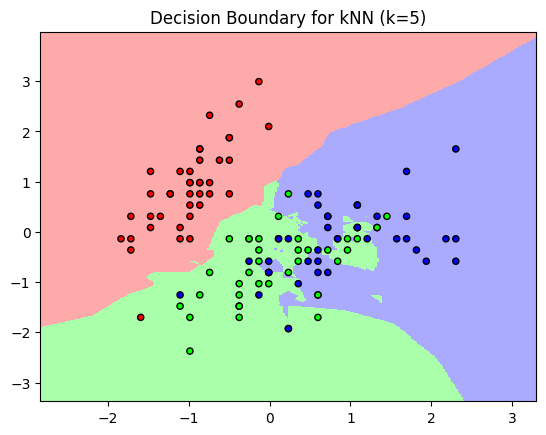

In [34]:
# Fungsi untuk memplot batas keputusan
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size dalam mesh

    # Setup colormap untuk plot
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Ambil dua fitur pertama
    X = X[:, :2]

    # Latih model
    model.fit(X, y)

    # Plot batas keputusan
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot juga data latih
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Visualisasi model kNN
knn = KNeighborsClassifier(n_neighbors=5)  # Misalnya
plot_decision_boundary(X_train, y_train, knn, "Decision Boundary for kNN (k=5)")
plt.show()

# **Confusion Matrix**

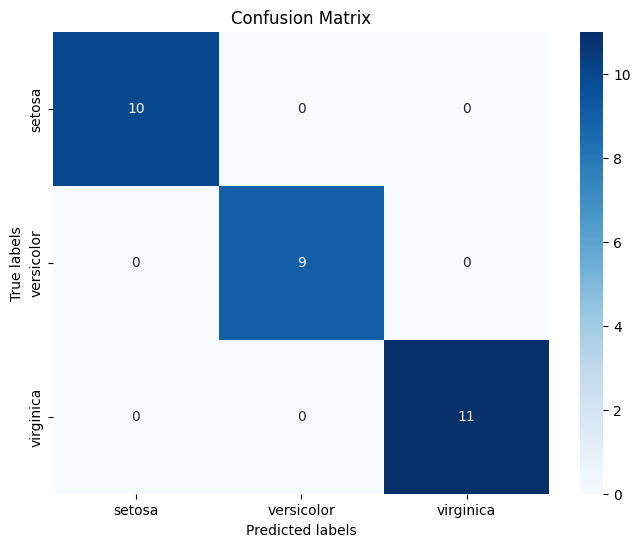

In [35]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()